In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

games = pd.read_csv("data/games.csv")

games

,Away_Team,Home_Team,Date,Ref_Crew,Accepted_Count,Yards,Away_Count,Away_Yards,Home_Count,Home_Yards,Total_Flags,Week,Year
0,Tennessee,Pittsburgh,09/10/2009,Bill Leavy,11,88,5,28,6,60,13,1,2009
1,Miami,Atlanta,09/13/2009,Walt Coleman,8,62,4,27,4,35,11,1,2009
2,Kansas City,Baltimore,09/13/2009,Gene Steratore,11,80,3,15,8,65,14,1,2009
3,Philadelphia,Carolina,09/13/2009,Jeff Triplette,14,106,9,76,5,30,14,1,2009
4,Denver,Cincinnati,09/13/2009,Jerome Boger,10,66,6,39,4,27,12,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577,Cleveland,Washington,01/01/2023,Bill Vinovich,8,44,3,20,5,24,11,17,2022
3578,San Francisco,Las Vegas,01/01/2023,Clay Martin,15,120,9,71,6,49,16,17,2022
3579,N.Y. Jets,Seattle,01/01/2023,Ron Torbert,7,35,2,10,5,25,7,17,2022
3580,Minnesota,Green Bay,01/01/2023,Carl Cheffers,9,65,6,35,3,30,11,17,2022


In [42]:
# change date string to date object
games['Date'] = pd.to_datetime(games['Date']);

# get rid of things older than 10 years
games = games[games['Date'] >= pd.to_datetime('2014-01-01')]

games = games.reset_index(drop=True)

games


,Away_Team,Home_Team,Date,Ref_Crew,Accepted_Count,Yards,Away_Count,Away_Yards,Home_Count,Home_Yards,Total_Flags,Week,Year
0,Oakland,Jacksonville,2016-10-23,Jeff Triplette,24,239,11,117,13,122,35,7,2016
1,Oakland,Tampa Bay,2016-10-30,Terry McAulay,29,264,23,200,6,64,34,8,2016
2,Las Vegas,Dallas,2021-11-25,Shawn Hochuli,28,276,14,110,14,166,33,12,2021
3,Chicago,San Francisco,2014-09-14,Carl Cheffers,26,176,10,58,16,118,33,2,2014
4,Tennessee,Detroit,2016-09-18,Brad Allen,29,221,12,83,17,138,31,2,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,Buffalo,N.Y. Jets,2017-01-01,Jeff Triplette,2,15,0,0,2,15,4,17,2016
2298,Arizona,Seattle,2018-12-30,Ron Torbert,4,30,3,20,1,10,4,17,2018
2299,Minnesota,Seattle,2019-12-02,Clete Blakeman,4,60,3,30,1,30,4,13,2019
2300,Tennessee,Green Bay,2020-12-27,Brad Allen,3,15,3,15,0,0,3,16,2020


Text(0, 0.5, 'Mean Flags per Game')

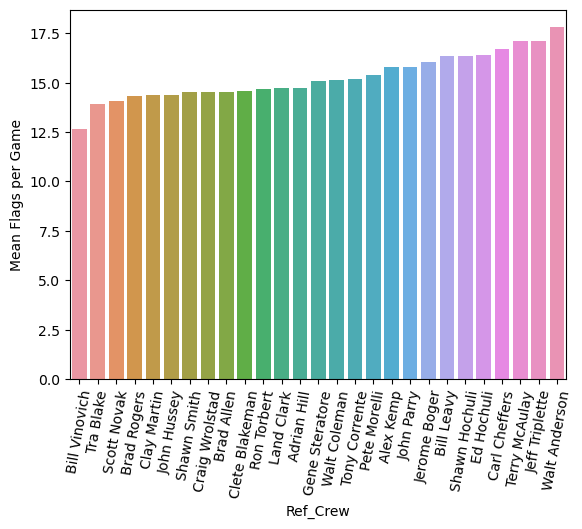

In [46]:
crew_flags_sum = games.groupby('Ref_Crew')['Total_Flags'].mean().reset_index()

sorted_by_total = crew_flags_sum.sort_values(by='Total_Flags')

sns.barplot(x=sorted_by_total['Ref_Crew'], y=sorted_by_total['Total_Flags'])
plt.xticks(rotation=80)
plt.ylabel('Mean Flags per Game')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Week', ylabel='Total_Flags'>

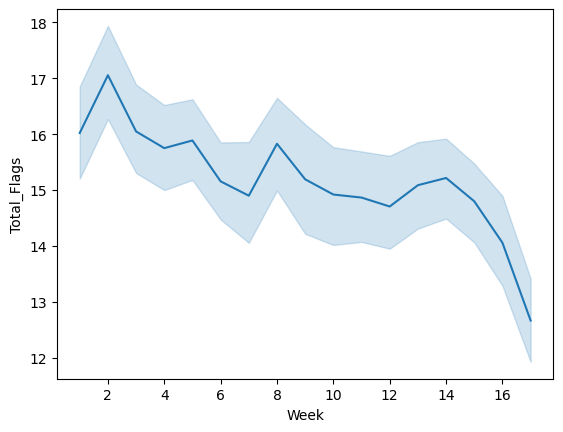

In [33]:
sns.lineplot(x=games['Week'], y=games['Total_Flags'])